# Kruskal-Szekeres coordinates in Schwarzschild spacetime

This Jupyter/SageMath worksheet is relative to the lectures
[Geometry and physics of black holes](http://luth.obspm.fr/~luthier/gourgoulhon/bh16/)
  
These computations are based on [SageManifolds](http://sagemanifolds.obspm.fr) (v0.9)

Click [here](https://raw.githubusercontent.com/egourgoulhon/BHLectures/master/sage/Schwarz_Kruskal_Szekeres.ipynb) to download the worksheet file (ipynb format). To run it, you must start SageMath with the Jupyter notebook, with the command `sage -n jupyter`

First we set up the notebook to display mathematical objects using LaTeX formatting:

In [1]:
%display latex

## Spacetime

We declare the spacetime manifold $M$:

In [2]:
M = Manifold(4, 'M')
print(M)

4-dimensional differentiable manifold M


## The ingoing Eddington-Finkelstein domain

The domain of ingoing Eddington-Finkelstein coordinates $(\tilde t, r, \theta, \phi)$:

In [3]:
M_EF = M.open_subset('M_EF', latex_name=r'M_{\rm EF}')

## The Schwarzschild-Droste domain

The domain of Schwarzschild-Droste coordinates is $M_{\rm SD} = M_{\rm I} \cup M_{\rm II}$:

In [4]:
M_SD = M_EF.open_subset('M_SD', latex_name=r'M_{\rm SD}')
M_I = M_SD.open_subset('M_I', latex_name=r'M_{\rm I}')
M_II = M_SD.open_subset('M_II', latex_name=r'M_{\rm II}')
M_SD.declare_union(M_I, M_II)

The Schwarzschild-Droste coordinates $(t,r,\theta,\phi)$:

In [5]:
X_SD.<t,r,th,ph> = M_SD.chart(r't r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\phi')
m = var('m') ; assume(m>=0)
X_SD.add_restrictions(r!=2*m)
X_SD

Chart (M_SD, (t, r, th, ph))

In [6]:
X_SD_I = X_SD.restrict(M_I, r>2*m) ; X_SD_I 

Chart (M_I, (t, r, th, ph))

In [7]:
X_SD_II = X_SD.restrict(M_II, r<2*m) ; X_SD_II

Chart (M_II, (t, r, th, ph))

In [8]:
M.default_chart()

Chart (M_SD, (t, r, th, ph))

## Eddington-Finkelstein coordinates

The ingoing Eddington-Finkelstein chart:

In [9]:
X_EF.<te,r,th,ph> = M_EF.chart(r'te:\tilde{t} r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\phi') 
X_EF

Chart (M_EF, (te, r, th, ph))

In [10]:
SD_to_EF = X_SD.transition_map(X_EF, [t+2*m*ln(abs(r/(2*m)-1)), r, th, ph])
SD_to_EF.display()

te = 2*m*log(abs(1/2*r/m - 1)) + t
r = r
th = th
ph = ph

In [11]:
SD_to_EF.inverse().display()

t = 2*m*log(2) + 2*m*log(m) - 2*m*log(abs(-2*m + r)) + te
r = r
th = th
ph = ph

In [12]:
X_EF_I = X_EF.restrict(M_I, r>2*m) ; X_EF_I 

Chart (M_I, (te, r, th, ph))

In [13]:
X_EF_II = X_EF.restrict(M_II, r<2*m) ; X_EF_II 

Chart (M_II, (te, r, th, ph))

In [14]:
M.atlas()

[Chart (M_SD, (t, r, th, ph)),
 Chart (M_I, (t, r, th, ph)),
 Chart (M_II, (t, r, th, ph)),
 Chart (M_EF, (te, r, th, ph)),
 Chart (M_SD, (te, r, th, ph)),
 Chart (M_I, (te, r, th, ph)),
 Chart (M_II, (te, r, th, ph))]

## Kruskal-Szekeres coordinates

In [15]:
X_KS.<T,X,th,ph> = M.chart(r'T X th:(0,pi):\theta ph:(0,2*pi):\phi')
X_KS.add_restrictions(T^2 < 1 + X^2)
X_KS

Chart (M, (T, X, th, ph))

In [19]:
X_KS_I = X_KS.restrict(M_I, [X>0, T<X, T>-X]) ; X_KS_I 

Chart (M_I, (T, X, th, ph))

In [20]:
X_KS_II = X_KS.restrict(M_II, [T<sqrt(1+X^2), T>abs(X)]) ; X_KS_II

Chart (M_II, (T, X, th, ph))

In [21]:
X_KS_EF = X_KS.restrict(M_EF, [-X<T, T<sqrt(1+X^2)]) ; X_KS_EF

Chart (M_EF, (T, X, th, ph))

In [24]:
SD_I_to_KS = X_SD_I.transition_map(X_KS_I, [sqrt(r/(2*m)-1)*exp(r/(4*m))*sinh(t/(4*m)), 
                                            sqrt(r/(2*m)-1)*exp(r/(4*m))*cosh(t/(4*m)), 
                                            th, ph])
SD_I_to_KS.display()

T = sqrt(1/2*r/m - 1)*e^(1/4*r/m)*sinh(1/4*t/m)
X = sqrt(1/2*r/m - 1)*cosh(1/4*t/m)*e^(1/4*r/m)
th = th
ph = ph

In [26]:
SD_II_to_KS = X_SD_II.transition_map(X_KS_II, [sqrt(1-r/(2*m))*exp(r/(4*m))*cosh(t/(4*m)), 
                                               sqrt(1-r/(2*m))*exp(r/(4*m))*sinh(t/(4*m)), 
                                               th, ph])
SD_II_to_KS.display()

T = sqrt(-1/2*r/m + 1)*cosh(1/4*t/m)*e^(1/4*r/m)
X = sqrt(-1/2*r/m + 1)*e^(1/4*r/m)*sinh(1/4*t/m)
th = th
ph = ph

In [28]:
EF_to_KS = X_EF.transition_map(X_KS_EF, [exp(r/(4*m))*(cosh(te/(4*m))-r/(4*m)*exp(-te/(4*m))), 
                                         exp(r/(4*m))*(sinh(te/(4*m))+r/(4*m)*exp(-te/(4*m))), 
                                         th, ph])
EF_to_KS.display()

T = -1/4*(r*e^(-1/4*te/m)/m - 4*cosh(1/4*te/m))*e^(1/4*r/m)
X = 1/4*(r*e^(-1/4*te/m)/m + 4*sinh(1/4*te/m))*e^(1/4*r/m)
th = th
ph = ph

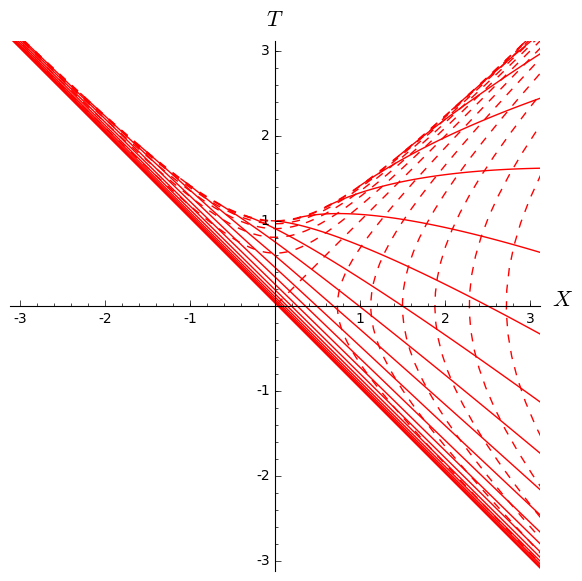

In [48]:
graph = X_EF.plot(X_KS, ambient_coords=(X,T), fixed_coords={th:pi/2,ph:0}, 
                  ranges={te:(-16,12), r:(0.0001,5)}, nb_values={te:24, r:16}, 
                  style={te:'--', r:'-'}, parameters={m:1})
show(graph, xmin=-3, xmax=3, ymin=-3, ymax=3)

## Radial null geodesics

The outgoing family:

In [49]:
var('u')
outgeod = M.curve({X_EF: [r + 4*m*ln(abs(r/(2*m)-1)) + u, r, pi/2, pi]}, (r, 0, +Infinity))
outgeod.display()

(0, +Infinity) --> M
   r |--> (te, r, th, ph) = (4*m*log(abs(1/2*r/m - 1)) + r + u, r, 1/2*pi, pi)
   r |--> (T, X, th, ph) = (1/2*(2*abs(-2*m + r)*cosh(-1/4*(4*m*log(2) + 4*m*log(m) - 4*m*log(abs(-2*m + r)) - r - u)/m)*e^(1/4*r/m + 1/4*u/m) - r)*e^(-1/4*u/m)/abs(-2*m + r), 1/2*(2*abs(-2*m + r)*e^(1/4*r/m + 1/4*u/m)*sinh(-1/4*(4*m*log(2) + 4*m*log(m) - 4*m*log(abs(-2*m + r)) - r - u)/m) + r)*e^(-1/4*u/m)/abs(-2*m + r), 1/2*pi, pi)

The ingoing family:

In [50]:
var('v')
ingeod = M.curve({X_EF: [-r + v, r, pi/2, pi]}, (r, 0, +Infinity))
ingeod.display()

(0, +Infinity) --> M
   r |--> (te, r, th, ph) = (-r + v, r, 1/2*pi, pi)
   r |--> (T, X, th, ph) = (1/4*(4*m*cosh(-1/4*(r - v)/m)*e^(1/4*r/m + 1/4*v/m) - r*e^(1/2*r/m))*e^(-1/4*v/m)/m, 1/4*(4*m*e^(1/4*r/m + 1/4*v/m)*sinh(-1/4*(r - v)/m) + r*e^(1/2*r/m))*e^(-1/4*v/m)/m, 1/2*pi, pi)